<a href="https://colab.research.google.com/github/amitobe-code/ML_NLU/blob/main/Movie_Analysis_New_31_May_tb_vader_maxfft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from scipy.spatial.distance import cdist
import seaborn as sns
import nltk


In [5]:
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/drive/MyDrive/Vader and TextBlob csvs/movie_lines_cleaned.csv')
df.shape
df

,Unnamed: 0,Dialogue,Char_ID,Movie_ID,Line_ID,Char_Name
0,0,They do not!,u0,m0,L1045,BIANCA
1,1,I hope so.,u0,m0,L985,BIANCA
2,2,Let's go.,u0,m0,L925,BIANCA
3,3,Okay -- you're gonna need to learn how to lie.,u0,m0,L872,BIANCA
4,4,I'm kidding. You know how sometimes you just ...,u0,m0,L870,BIANCA
...,...,...,...,...,...,...
304708,304708,So far only their scouts. But we have had repo...,u9034,m616,L666522,VEREKER
304709,304709,"Well I assure you, Sir, I have no desire to cr...",u9034,m616,L666520,VEREKER
304710,304710,I think Chelmsford wants a good man on the bor...,u9034,m616,L666372,VEREKER
304711,304711,I'm to take the Sikali with the main column to...,u9034,m616,L666370,VEREKER


In [8]:
df_out_vader = pd.DataFrame(index=[],columns=['compound','Char_ID','Char_Name','Line_ID','neg','neu','pos','Movie_ID','Sen_len','Dialogue'])
df_out_vader.head()

,compound,Char_ID,Char_Name,Line_ID,neg,neu,pos,Movie_ID,Sen_len,Dialogue


In [9]:
len(df_out_vader.index)

0

In [10]:
df_out_textblob = pd.DataFrame(index=[],columns=['Char_ID','Char_Name','Line_ID','Polarity','Subjectivity','Movie_ID','Sen_len','Dialogue'])
df_out_textblob.head()

,Char_ID,Char_Name,Line_ID,Polarity,Subjectivity,Movie_ID,Sen_len,Dialogue


In [11]:
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def process_vader(char_id,char_name,line_id,movie_id,dialogue):
  obj = SentimentIntensityAnalyzer()
  blob = TextBlob(str(dialogue))
  global df_out_vader
  for sentence in blob.sentences:
        
        d = obj.polarity_scores(str(sentence))
        df_out_vader.loc[len(df_out_vader.index)] = [d['compound'],char_id,char_name,line_id,d['neg'],d['neu'],d['pos'],movie_id,1,str(sentence)] 

In [12]:
def process_textblob(char_id,char_name,line_id,movie_id,dialogue):
  blob = TextBlob(dialogue)
  global df_out_textblob
  for sentence in blob.sentences:
        mini_blob = TextBlob(str(sentence))
        polarity=mini_blob.sentiment.polarity
        subjectivity=mini_blob.sentiment.subjectivity
        df_out_textblob.loc[len(df_out_textblob.index)] = [char_id,char_name,line_id,polarity,subjectivity,movie_id,1,str(sentence)]

In [13]:
#df.dropna().apply(lambda x: process_vader(x['Char_ID'], x['Char_Name'],x['Line_ID'],x['Movie_ID'],x['Dialogue']), axis=1)

In [14]:
  #df.dropna().apply(lambda x: process_textblob(x['Char_ID'], x['Char_Name'],x['Line_ID'],x['Movie_ID'],x['Dialogue']), axis=1)

In [15]:
#df_out_vader.to_csv('vader_fresh.csv')
#df_out_textblob.to_csv('text_blob_fresh.csv')

In [16]:
vader = pd.read_csv('/content/drive/MyDrive/Vader and TextBlob csvs/vader.csv')
textblob = pd.read_csv('/content/drive/MyDrive/Vader and TextBlob csvs/text_blob.csv')

In [17]:
vader.query('compound < 0')

,Unnamed: 0,compound,Char_ID,Char_Name,Line_ID,neg,neu,pos,Movie_ID,Sen_len,Dialogue
7,7,-0.1779,u0,BIANCA,L869,0.330,0.412,0.258,m0,1,Like my fear of wearing pastels?
12,12,-0.4588,u0,BIANCA,L862,0.375,0.625,0.000,m0,1,do you listen to this crap?
28,28,-0.2235,u0,BIANCA,L368,0.159,0.841,0.000,m0,1,"And I never, ever use a blowdryer without the ..."
31,31,-0.5106,u0,BIANCA,L364,0.355,0.645,0.000,m0,1,You and that thug are obviously failing.
35,35,-0.2263,u0,BIANCA,L275,0.655,0.345,0.000,m0,1,Forget French.
...,...,...,...,...,...,...,...,...,...,...,...
514697,514697,-0.3400,u9030,DURNFORD,L666257,0.324,0.676,0.000,m616,1,Gentlemen who can ride and shoot
514698,514698,-0.2960,u9029,CREALOCK,L666547,0.600,0.000,0.400,m616,1,"Certainly, Sin"
514700,514700,-0.5423,u9029,CREALOCK,L666460,0.179,0.821,0.000,m616,1,The only reports of enemy activity have come f...
514726,514726,-0.2263,u9031,MELVILL,L666327,0.181,0.709,0.110,m616,1,ft could be you flatter yourself CoghilL It's ...


In [18]:
cols=[]
for i in range(1,17):
    cols.append("Sen"+str(i))

In [19]:
gb = vader.groupby('Movie_ID')



In [20]:
gb.head()

,Unnamed: 0,compound,Char_ID,Char_Name,Line_ID,neg,neu,pos,Movie_ID,Sen_len,Dialogue
0,0,0.0000,u0,BIANCA,L1045,0.000,1.000,0.000,m0,1,They do not!
1,1,0.4404,u0,BIANCA,L985,0.000,0.408,0.592,m0,1,I hope so.
2,2,0.0000,u0,BIANCA,L925,0.000,1.000,0.000,m0,1,Let's go.
3,3,0.2263,u0,BIANCA,L872,0.000,0.826,0.174,m0,1,Okay -- you're gonna need to learn how to lie.
4,4,0.1027,u0,BIANCA,L870,0.000,0.417,0.583,m0,1,I'm kidding.
...,...,...,...,...,...,...,...,...,...,...,...
514615,514615,-0.2617,u9025,BLOOMFIELD,L666463,0.119,0.807,0.074,m616,1,Zulu may not wear shoes or trousers and the li...
514616,514616,-0.3612,u9025,BLOOMFIELD,L666463,0.238,0.762,0.000,m616,1,They'll watch us and wait and find our weakn...
514617,514617,-0.6114,u9025,BLOOMFIELD,L666368,0.175,0.747,0.078,m616,1,One Zulu is only one man.. ..and I'm afeared o...
514618,514618,0.0000,u9025,BLOOMFIELD,L666366,0.000,1.000,0.000,m616,1,Could be.


In [21]:
df_framed_vader = pd.DataFrame(index=[],columns=['Movie_ID','Frame No.']+cols)
df_framed_vader.head()

,Movie_ID,Frame No.,Sen1,Sen2,Sen3,Sen4,Sen5,Sen6,Sen7,Sen8,Sen9,Sen10,Sen11,Sen12,Sen13,Sen14,Sen15,Sen16


In [22]:
v_frame=[]
for movie in vader.Movie_ID.unique():
    temp = gb.get_group(movie)
    frame_num=1
    compound=[temp['compound'].iloc[0]]
    for i in range(1,len(temp.index)):
        compound.append(temp['compound'].iloc[i])
        if i%16 ==15:
            df_framed_vader.loc[len(df_framed_vader.index)]=[movie,frame_num]+compound
            frame_num=frame_num+1
            compound=[]
    if len(compound)<16 and len(compound)>0:
        for i in range(16-len(compound)):
            compound.append(0.0)
        df_framed_vader.loc[len(df_framed_vader.index)]=[movie,frame_num]+compound
    global v_frame
    v_frame.append(frame_num)

In [23]:
gb2 = textblob.groupby('Movie_ID')

In [24]:
df_framed_textblob = pd.DataFrame(index=[],columns=['Movie_ID','Frame No.']+cols)
df_framed_textblob.head()

,Movie_ID,Frame No.,Sen1,Sen2,Sen3,Sen4,Sen5,Sen6,Sen7,Sen8,Sen9,Sen10,Sen11,Sen12,Sen13,Sen14,Sen15,Sen16


In [25]:
t_frame=[]
for movie in textblob.Movie_ID.unique():
    temp = gb2.get_group(movie)
    frame_num=1
    compound=[temp['Polarity'].iloc[0]]
    for i in range(1,len(temp.index)):
        compound.append(temp['Polarity'].iloc[i])
        if i%16 ==15:
            df_framed_textblob.loc[len(df_framed_textblob.index)]=[movie,frame_num]+compound
            frame_num=frame_num+1
            compound=[]
    if len(compound)<16 and len(compound)>0:
        for i in range(16-len(compound)):
            compound.append(0.0)
        df_framed_textblob.loc[len(df_framed_textblob.index)]=[movie,frame_num]+compound
    global t_frame
    t_frame.append(frame_num)

In [26]:
df_framed_textblob

,Movie_ID,Frame No.,Sen1,Sen2,Sen3,Sen4,Sen5,Sen6,Sen7,Sen8,Sen9,Sen10,Sen11,Sen12,Sen13,Sen14,Sen15,Sen16
0,m0,1,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,0.0,0.700000,0.000000,-0.125000,-1.000000,-0.800000,0.000,0.000000,0.000000
1,m0,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.375000,0.200000,0.000000,0.000000,0.000000,0.350,0.000000,0.000000
2,m0,3,0.000000,0.000000,-0.187500,0.000000,0.000000,0.300000,0.7,0.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.015238,0.166667
3,m0,4,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.0,0.0,0.333333,0.450000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
4,m0,5,0.500000,0.000000,-0.312500,0.300000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32462,m616,4,0.833333,0.833333,0.000000,0.000000,0.050000,-0.050000,0.7,0.0,0.000000,0.350000,0.285714,0.000000,0.000000,0.255,0.350000,0.000000
32463,m616,5,0.125000,-0.050000,0.000000,0.000000,0.000000,0.000000,0.3,0.0,0.000000,0.350000,0.550000,0.000000,0.000000,1.000,0.000000,0.000000
32464,m616,6,0.000000,0.700000,0.000000,0.214286,0.214286,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.285714,0.000000,0.000,-0.187500,0.000000
32465,m616,7,0.200000,0.000000,0.333333,0.000000,0.000000,0.285714,0.0,0.0,0.000000,0.250000,0.000000,0.000000,0.166667,1.000,0.000000,-0.166667


In [27]:
df_framed_vader.to_csv('framed_vader.csv')
df_framed_textblob.to_csv('framed_textblob.csv')

In [28]:
framed_textblob = pd.read_csv('/content/drive/MyDrive/Vader and TextBlob csvs/framed_textblob.csv')
framed_vader = pd.read_csv('/content/drive/MyDrive/Vader and TextBlob csvs/framed_vader.csv')

In [29]:
framed_vader

,Unnamed: 0,Movie_ID,Frame No.,Sen1,Sen2,Sen3,Sen4,Sen5,Sen6,Sen7,Sen8,Sen9,Sen10,Sen11,Sen12,Sen13,Sen14,Sen15,Sen16
0,0,m0,1,0.0000,0.4404,0.0000,0.2263,0.1027,0.0000,0.0000,-0.1779,0.4404,0.0000,0.0000,0.0516,-0.4588,0.3612,0.0000,0.2732
1,1,m0,2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.7220,0.0000,0.0000,0.0000,-0.2235,0.4588,0.4019,-0.5106
2,2,m0,3,0.0000,0.0000,0.0000,-0.2263,-0.0572,0.4939,0.6597,0.2960,0.3612,0.0000,0.0000,0.0000,0.0000,0.0000,0.3167,-0.2263
3,3,m0,4,0.0000,0.0000,-0.4019,0.0000,0.5095,0.0000,0.0000,0.3182,0.0000,-0.6240,0.0000,0.0000,0.0000,0.1531,0.0000,0.0000
4,4,m0,5,0.0000,0.0000,0.0000,-0.0867,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4588,0.0000,0.4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32462,32462,m616,4,0.5859,0.6249,0.4019,0.3612,0.0000,-0.2023,0.5927,0.0000,-0.4576,0.0772,0.0000,0.0000,0.0000,0.1779,0.0000,0.0000
32463,32463,m616,5,0.0000,0.0772,0.0000,-0.6808,0.0000,0.0000,0.1280,0.0000,0.2263,0.6369,0.5256,0.0000,0.0000,0.7650,0.0000,0.0772
32464,32464,m616,6,0.0000,0.6808,-0.3400,-0.2960,0.4019,-0.5423,0.0000,0.0000,0.4019,0.0000,0.0000,0.0000,0.3182,0.2732,0.0000,0.4019
32465,32465,m616,7,0.2732,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2732,0.0000,0.4019,0.0000,0.0000,0.0000,0.6369,0.0000,-0.2263


In [30]:
import scipy

In [31]:
fft_cols=[]
cols=[]
for i in range(0,9):
    fft_cols.append("bin_"+str(i))
for i in range(1,17):
    cols.append("Sen"+str(i))

In [32]:
vader_fft = pd.DataFrame(index=[],columns=['Movie_ID','Frame No.']+fft_cols)
textblob_fft = pd.DataFrame(index=[],columns=['Movie_ID','Frame No.']+fft_cols)

In [33]:
def fft_vader(movie_id,frame_num,l):
    l=np.array(l)
    rfft = scipy.fft.rfft(l)
    abs_vals=[]
    for vec in rfft:
        abs_vals.append(np.abs(vec)**2)
    global vader_fft
    vader_fft.loc[len(vader_fft.index)]=[movie_id,frame_num]+abs_vals

In [34]:
def fft_tb(movie_id,frame_num,l):
    l=np.array(l)
    rfft = scipy.fft.rfft(l)
    abs_vals=[]
    for vec in rfft:
        abs_vals.append(np.abs(vec)**2)
    global textblob_fft
    textblob_fft.loc[len(textblob_fft.index)]=[movie_id,frame_num]+abs_vals

In [35]:
framed_vader.apply(lambda x: fft_vader(x['Movie_ID'],x['Frame No.'],x[cols]), axis=1)
vader_fft

,Movie_ID,Frame No.,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8
0,m0,1,1.585333,0.494422,0.557556,0.603261,0.190633,0.470167,0.790500,2.702803,1.189190
1,m0,2,0.720122,0.622330,0.201039,2.661615,0.949068,1.483713,2.852368,0.048220,0.906685
2,m0,3,2.616953,2.254725,2.433594,0.582526,0.875272,0.347713,0.486344,0.092366,0.889438
3,m0,4,0.002034,0.200760,2.079444,0.085806,1.453329,3.063121,0.173055,0.391035,0.067756
4,m0,5,0.599076,0.696562,0.449227,0.062514,0.020621,0.062514,0.449227,0.696562,0.599076
...,...,...,...,...,...,...,...,...,...,...,...
32462,m616,4,4.673379,3.685888,0.483918,1.974314,0.850648,2.771107,0.938348,0.275499,0.007056
32463,m616,5,3.081429,4.676350,0.557913,0.100740,4.520225,0.308824,1.014992,1.761240,0.000019
32464,m616,6,1.688960,1.469661,0.743541,0.180392,2.230958,1.023518,2.468910,3.973620,0.069907
32465,m616,7,1.846609,0.403441,0.059388,0.547314,1.058504,1.567301,0.204738,1.047159,0.660156


In [36]:
framed_textblob.apply(lambda x: fft_tb(x['Movie_ID'],x['Frame No.'],x[cols]), axis=1)
textblob_fft

,Movie_ID,Frame No.,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8
0,m0,1,0.525625,5.173433,3.664674,6.380041,0.250625,0.375854,1.366576,1.653172,0.075625
1,m0,2,0.855625,0.341253,0.083575,0.603046,0.443125,0.003204,0.242675,0.264997,0.030625
2,m0,3,1.426603,0.992798,1.890490,0.848110,0.282952,0.313938,0.188271,0.225818,0.019301
3,m0,4,1.646944,0.668567,0.124212,1.094162,0.896944,0.033060,0.336344,0.458655,0.146944
4,m0,5,0.237656,0.158263,0.092942,0.309710,0.750156,1.007544,0.782371,0.275108,0.012656
...,...,...,...,...,...,...,...,...,...,...,...
32462,m616,4,13.013197,0.896954,2.181234,1.718836,2.132118,2.225892,2.128526,0.069171,0.690086
32463,m616,5,5.175625,1.786123,0.196894,0.149919,2.215625,3.286851,0.939356,1.049607,0.105625
32464,m616,6,1.505003,0.538105,1.078664,0.568453,0.201432,0.611680,0.563486,0.586469,1.376432
32465,m616,7,4.280958,0.492880,0.746350,1.089611,2.899212,0.656569,1.679058,0.878422,0.447625


In [37]:
vader_fft.to_csv('fft_vader.csv')
textblob_fft.to_csv('fft_textblob.csv')

In [38]:
vader_ensemble_mean = vader_fft[fft_cols].stack().mean()
tb_ensemble_mean = textblob_fft[fft_cols].stack().mean()

In [39]:
fft_vader_denoised = pd.DataFrame(index=[],columns=['Movie_ID','Frame No.']+fft_cols)
fft_textblob_denoised = pd.DataFrame(index=[],columns=['Movie_ID','Frame No.']+fft_cols)

In [40]:
def vader_denoising(movie_id,frame_num,l):
    l=np.array(l)
    frame_mean = np.mean(l)
    global vader_ensemble_mean
    if frame_mean >= vader_ensemble_mean:
        for i in range(len(l)):
            if l[i]-0.7*frame_mean>=0:
                l[i] = l[i]-0.7*frame_mean
            else:
                l[i] = 0
    else:
        for i in range(len(l)):
            l[i]=0
    global fft_vader_denoised
    fft_vader_denoised.loc[len(fft_vader_denoised.index)]=[movie_id,frame_num]+list(l)

In [41]:
def textblob_denoising(movie_id,frame_num,l):
    l=np.array(l)
    frame_mean = np.mean(l)
    global tb_ensemble_mean
    if frame_mean >= tb_ensemble_mean:
        for i in range(len(l)):
            if l[i]-0.7*frame_mean>=0:
                l[i] = l[i]-0.7*frame_mean
            else:
                l[i] = 0
    else:
        for i in range(len(l)):
            l[i]=0
    global fft_textblob_denoised
    fft_textblob_denoised.loc[len(fft_textblob_denoised.index)]=[movie_id,frame_num]+list(l)

In [42]:
vader_fft.apply(lambda x: vader_denoising(x['Movie_ID'],x['Frame No.'],x[fft_cols]), axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
32462    None
32463    None
32464    None
32465    None
32466    None
Length: 32467, dtype: object

In [43]:
textblob_fft.apply(lambda x: textblob_denoising(x['Movie_ID'],x['Frame No.'],x[fft_cols]), axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
32462    None
32463    None
32464    None
32465    None
32466    None
Length: 32467, dtype: object

In [44]:
fft_vader_denoised

,Movie_ID,Frame No.,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8
0,m0,1,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,m0,2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,m0,3,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,m0,4,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,m0,5,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
32462,m616,4,3.455367,2.467876,0.0,0.756302,0.000000,1.553094,0.000000,0.000000,0.0
32463,m616,5,1.835294,3.430216,0.0,0.000000,3.274090,0.000000,0.000000,0.515106,0.0
32464,m616,6,0.611779,0.392481,0.0,0.000000,1.153777,0.000000,1.391729,2.896439,0.0
32465,m616,7,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [45]:
fft_vader_denoised.to_csv('fft_vader_denoised.csv')

In [46]:
fft_textblob_denoised.to_csv('fft_textblob_denoised.csv')

In [47]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()
fft_textblob_denoised[fft_cols] = scaler.fit_transform(fft_textblob_denoised[fft_cols])

In [49]:
scaler = MinMaxScaler()
fft_vader_denoised[fft_cols] = scaler.fit_transform(fft_vader_denoised[fft_cols])

In [50]:
fft_vader_denoised_high = fft_vader_denoised.drop(columns=['bin_0','bin_1','bin_2','bin_3'])
fft_textblob_denoised_high = fft_textblob_denoised.drop(columns=['bin_0','bin_1','bin_2','bin_3'])
bins=['bin_4','bin_5','bin_6','bin_7','bin_8']

In [51]:
from sklearn.decomposition import PCA
pca_vader = PCA(n_components=2)
pca_vader_components = pca_vader.fit_transform(fft_vader_denoised_high[bins])
pca_textblob = PCA(n_components=2)
pca_textblob_components = pca_textblob.fit_transform(fft_textblob_denoised_high[bins])

In [52]:
pca_vader = pd.DataFrame(data = pca_vader_components, columns = ['pc1', 'pc2'])
pca_textblob = pd.DataFrame(data = pca_textblob_components, columns = ['pc1', 'pc2'])

In [53]:
kmeans_vader = KMeans(n_clusters=4,n_init=100)
kmeans_textblob = KMeans(n_clusters=4,n_init=100)

In [54]:
kmeans_vader.fit(pca_vader[['pc1','pc2']])
vader_preds = kmeans_vader.predict(pca_vader[['pc1','pc2']])
pca_vader['Cluster_num'] = pd.Series(vader_preds, index=pca_vader.index)
fft_vader_denoised['Cluster_num'] = pd.Series(vader_preds, index=fft_vader_denoised.index)
pca_vader
fft_vader_denoised

,Movie_ID,Frame No.,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,Cluster_num
0,m0,1,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0
1,m0,2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0
2,m0,3,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0
3,m0,4,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0
4,m0,5,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32462,m616,4,0.060749,0.100478,0.0,0.037378,0.000000,0.128648,0.000000,0.000000,0.0,3
32463,m616,5,0.032266,0.139660,0.0,0.000000,0.185042,0.000000,0.000000,0.036898,0.0,0
32464,m616,6,0.010756,0.015980,0.0,0.000000,0.065208,0.000000,0.090858,0.207478,0.0,2
32465,m616,7,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0


In [55]:
kmeans_textblob.fit(pca_textblob[['pc1','pc2']])
tb_preds = kmeans_vader.predict(pca_textblob[['pc1','pc2']])
pca_textblob['Cluster_num'] = pd.Series(tb_preds, index=pca_textblob.index)
fft_textblob_denoised['Cluster_num'] = pd.Series(tb_preds, index=fft_textblob_denoised.index)
pca_textblob


,pc1,pc2,Cluster_num
0,-0.040067,-0.002745,0
1,-0.043288,-0.003024,0
2,-0.043288,-0.003024,0
3,-0.043288,-0.003024,0
4,-0.043288,-0.003024,0
...,...,...,...
32462,-0.018126,-0.014714,0
32463,0.047479,-0.012704,3
32464,-0.043288,-0.003024,0
32465,0.028043,-0.042287,0


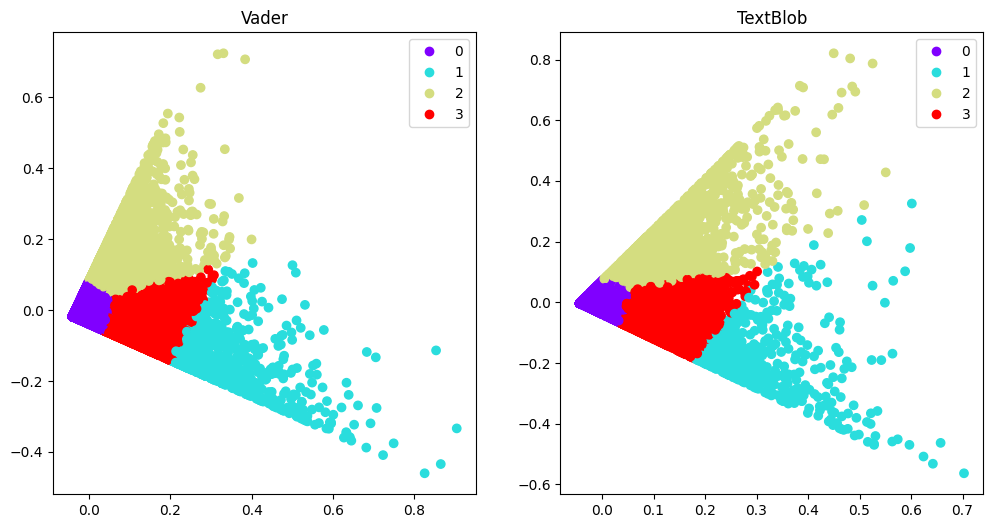

In [56]:
%matplotlib inline
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
scatter1 = ax1.scatter(x=pca_vader['pc1'],y=pca_vader['pc2'],c=pca_vader['Cluster_num'],cmap='rainbow')
ax1.set_title("Vader")
ax1.legend(*scatter1.legend_elements())
scatter2 = ax2.scatter(x=pca_textblob['pc1'],y=pca_textblob['pc2'],c=pca_textblob['Cluster_num'],cmap='rainbow')
ax2.set_title("TextBlob")
ax2.legend(*scatter2.legend_elements())

In [108]:
textblob_cluster_freq = pca_textblob['Cluster_num'].value_counts().sort_index()
vader_cluster_freq = pca_vader['Cluster_num'].value_counts().sort_index()

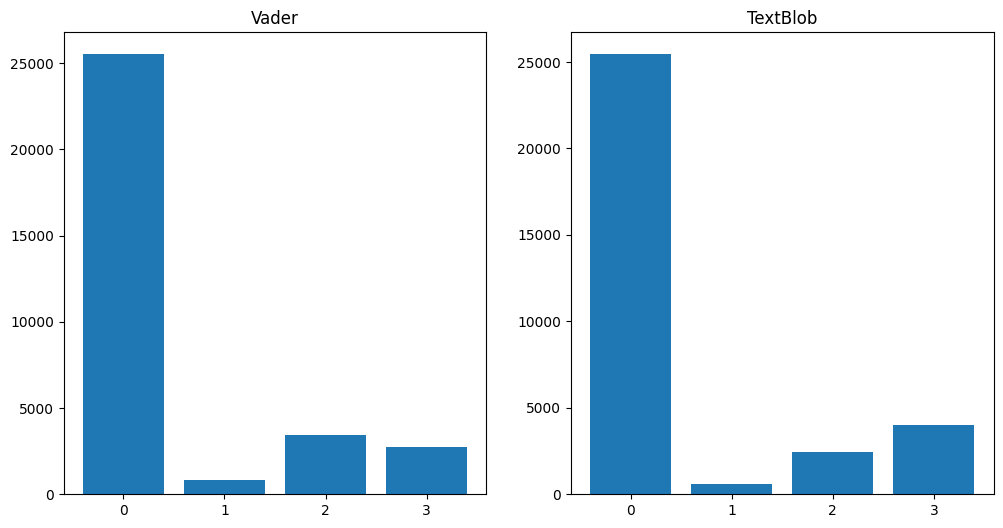

In [109]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.bar(['0','1','2','3'],vader_cluster_freq.values)
ax1.set_title("Vader")
ax2.bar(['0','1','2','3'],textblob_cluster_freq.values)
ax2.set_title("TextBlob")
plt.show()

In [59]:
fft_vader_denoised.query('Cluster_num == 2')

,Movie_ID,Frame No.,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,Cluster_num
6,m0,7,0.005995,0.134971,0.059251,0.000000,0.000000,0.000000,0.228746,0.182125,0.000000,2
12,m0,13,0.000000,0.018385,0.153688,0.000000,0.000000,0.006230,0.122187,0.055892,0.093961,2
35,m0,36,0.000000,0.000000,0.036429,0.051446,0.000000,0.000000,0.000000,0.146254,0.267461,2
39,m0,40,0.000000,0.000000,0.293859,0.106502,0.000000,0.000000,0.000000,0.133024,0.000000,2
48,m0,49,0.000000,0.000000,0.000000,0.199413,0.311108,0.000000,0.000000,0.000000,0.279196,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32439,m615,33,0.407449,0.004030,0.000000,0.000000,0.000000,0.000000,0.000000,0.221507,0.117661,2
32442,m615,36,0.000000,0.000000,0.030060,0.000000,0.086595,0.000000,0.000000,0.174799,0.163371,2
32449,m615,43,0.018214,0.000000,0.000000,0.082079,0.165949,0.000344,0.000000,0.144984,0.000000,2
32461,m616,3,0.031444,0.000000,0.013000,0.017090,0.003825,0.000000,0.212198,0.047549,0.000000,2


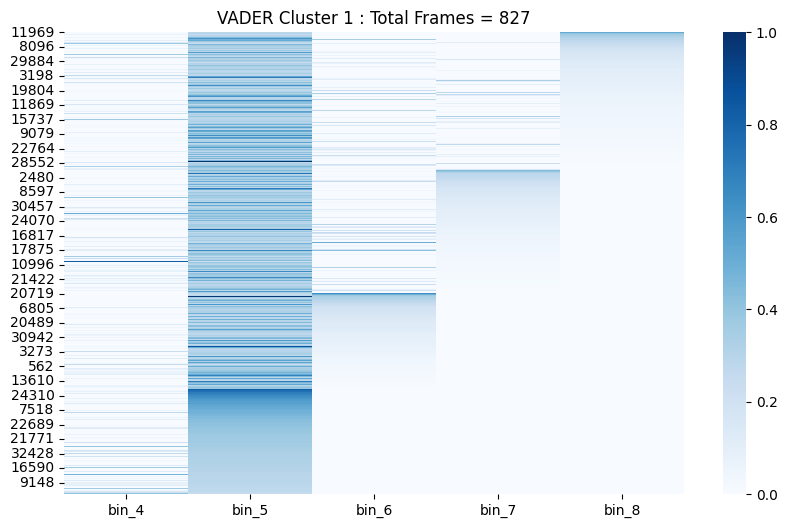

In [60]:
fig, ax = plt.subplots(figsize=(10,6))
num = 1
ax = sns.heatmap(fft_vader_denoised.query('Cluster_num == @num')[bins].sort_values(['bin_8','bin_7','bin_6','bin_5','bin_4'],ascending = False),cmap="Blues").set_title('VADER Cluster '+str(num)+' : Total Frames = '+str(len(fft_vader_denoised.query('Cluster_num == @num')[bins])))

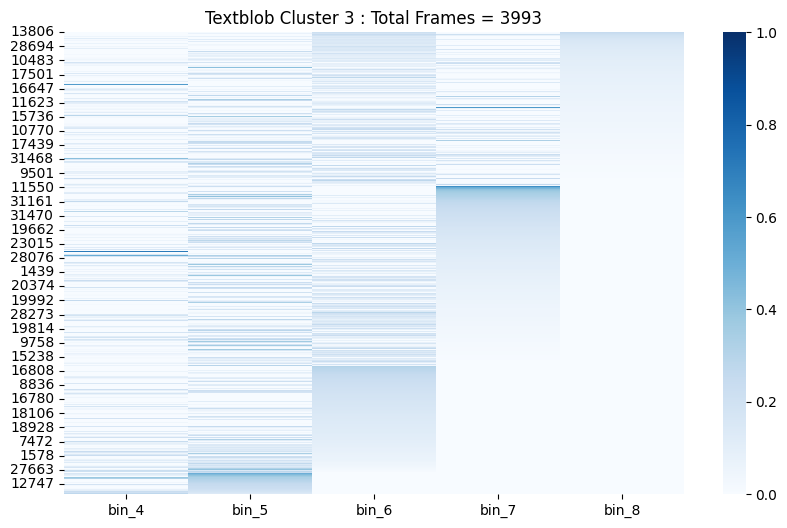

In [61]:
fig, ax = plt.subplots(figsize=(10,6))
num = 3
ax = sns.heatmap(fft_textblob_denoised.query('Cluster_num == @num')[bins].sort_values(['bin_8','bin_7','bin_6','bin_5','bin_4'],ascending = False),cmap="Blues").set_title('Textblob Cluster '+str(num)+' : Total Frames = '+str(len(fft_textblob_denoised.query('Cluster_num == @num')[bins])))

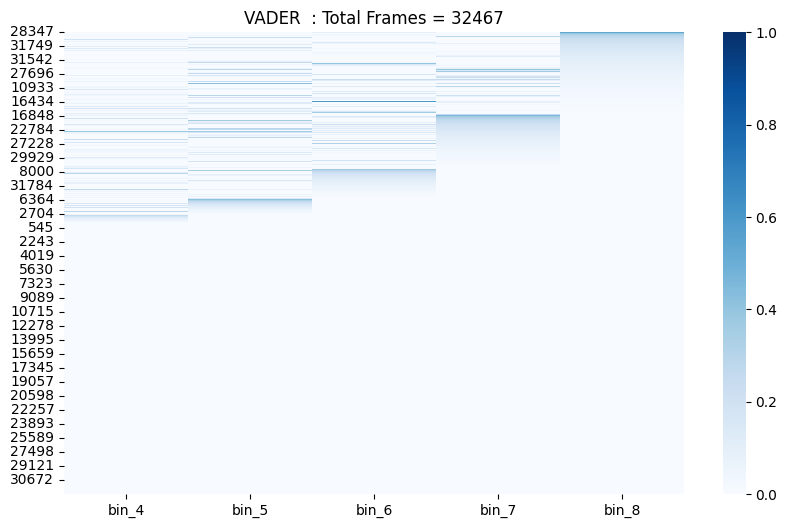

In [62]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(fft_vader_denoised[bins].sort_values(['bin_8','bin_7','bin_6','bin_5','bin_4'],ascending = False),cmap="Blues").set_title('VADER  : Total Frames = '+str(len(fft_vader_denoised.index)))

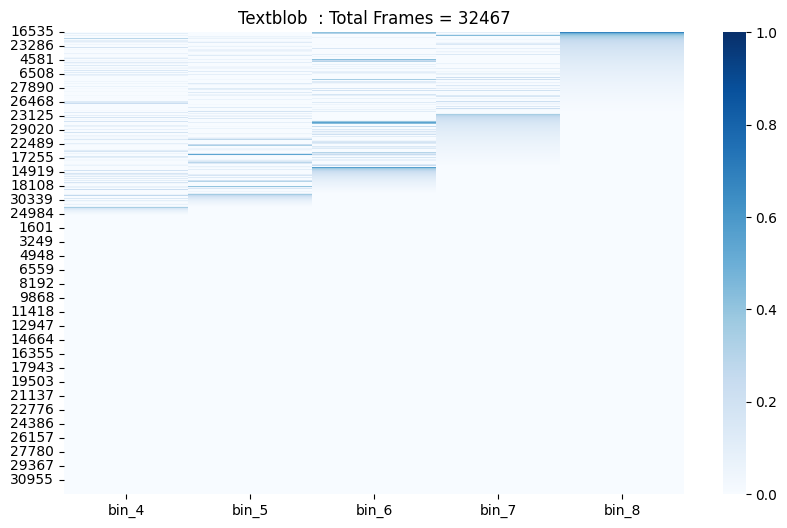

In [63]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(fft_textblob_denoised[bins].sort_values(['bin_8','bin_7','bin_6','bin_5','bin_4'],ascending = False),cmap="Blues").set_title('Textblob  : Total Frames = '+str(len(fft_textblob_denoised.index)))

In [64]:
vader_high_freq = []
vader_high_freq = fft_vader_denoised[(fft_vader_denoised['Cluster_num']==3)|(fft_vader_denoised['Cluster_num']==2)] 
vader_high_freq

,Movie_ID,Frame No.,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,Cluster_num
6,m0,7,0.005995,0.134971,0.059251,0.000000,0.000000,0.000000,0.228746,0.182125,0.000000,2
12,m0,13,0.000000,0.018385,0.153688,0.000000,0.000000,0.006230,0.122187,0.055892,0.093961,2
13,m0,14,0.096709,0.024765,0.001701,0.000000,0.000000,0.216355,0.000000,0.000000,0.000000,3
31,m0,32,0.060080,0.000000,0.023463,0.029597,0.000000,0.267221,0.000000,0.000000,0.000000,3
35,m0,36,0.000000,0.000000,0.036429,0.051446,0.000000,0.000000,0.000000,0.146254,0.267461,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32449,m615,43,0.018214,0.000000,0.000000,0.082079,0.165949,0.000344,0.000000,0.144984,0.000000,2
32457,m615,51,0.000000,0.021250,0.000000,0.000000,0.103049,0.081658,0.000000,0.038517,0.113043,3
32461,m616,3,0.031444,0.000000,0.013000,0.017090,0.003825,0.000000,0.212198,0.047549,0.000000,2
32462,m616,4,0.060749,0.100478,0.000000,0.037378,0.000000,0.128648,0.000000,0.000000,0.000000,3


In [65]:
textblob_high_freq = []
textblob_high_freq = fft_textblob_denoised[(fft_textblob_denoised['Cluster_num']==3)]
textblob_high_freq

,Movie_ID,Frame No.,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,Cluster_num
23,m0,24,0.000000,0.126821,0.017559,0.000000,0.000000,0.354191,0.000000,0.087848,0.000000,3
25,m0,26,0.000000,0.075465,0.002804,0.110108,0.000000,0.000000,0.149509,0.020860,0.025101,3
26,m0,27,0.000000,0.038213,0.056140,0.044688,0.000000,0.089141,0.217784,0.000000,0.000000,3
46,m0,47,0.000000,0.000000,0.038988,0.000000,0.023382,0.052795,0.113539,0.055837,0.116238,3
52,m0,53,0.000000,0.008007,0.000000,0.113620,0.050594,0.050144,0.113785,0.002220,0.041300,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32444,m615,38,0.125587,0.000000,0.000000,0.000000,0.011174,0.155420,0.000000,0.105689,0.000000,3
32454,m615,48,0.065692,0.027345,0.000000,0.055326,0.005389,0.000000,0.158157,0.064493,0.000000,3
32456,m615,50,0.000000,0.000000,0.000000,0.208601,0.000000,0.293371,0.000000,0.092661,0.000000,3
32457,m615,51,0.000000,0.001375,0.038627,0.000000,0.105343,0.234116,0.002428,0.000000,0.000000,3


In [66]:
fft_vader_denoised = fft_vader_denoised.sort_values(['bin_8','bin_7','bin_6','bin_5','bin_4'],ascending = [False, False,False,False,False])
fft_textblob_denoised = fft_textblob_denoised.sort_values(['bin_8','bin_7','bin_6','bin_5','bin_4'],ascending = [False, False,False,False,False])

In [67]:
vader_high_freq_movies = vader_high_freq['Movie_ID'].unique()
vader_count={}
for movie in vader_high_freq_movies:
    vader_count[movie] = vader_high_freq['Movie_ID'].value_counts()[movie]*100/fft_vader_denoised['Movie_ID'].value_counts()[movie]

In [68]:
textblob_high_freq_movies = textblob_high_freq['Movie_ID'].unique()
textblob_count={}
for movie in textblob_high_freq_movies:
    textblob_count[movie] = textblob_high_freq['Movie_ID'].value_counts()[movie]*100/fft_textblob_denoised['Movie_ID'].value_counts()[movie]

In [69]:
vader_data={}
data={}
data['Movie_ID'] = vader_count.keys()
data['High_freq %'] = vader_count.values()

In [70]:
vader_final_movies = pd.DataFrame(data,columns=['Movie_ID','High_freq %'])


In [71]:
vader_final_movies.sort_values(['High_freq %'],ascending=False)

,Movie_ID,High_freq %
593,m604,63.157895
109,m110,51.724138
28,m28,51.351351
56,m56,50.000000
483,m493,50.000000
...,...,...
373,m379,3.448276
99,m100,3.260870
368,m374,2.739726
31,m31,2.631579


In [72]:
tb_data={}
tb_data['Movie_ID'] = textblob_count.keys()
tb_data['High_freq %'] = textblob_count.values()

In [73]:
textblob_final_movies = pd.DataFrame(tb_data,columns=['Movie_ID','High_freq %'])

In [74]:
textblob_final_movies.sort_values(['High_freq %'],ascending=False)

,Movie_ID,High_freq %
265,m270,50.000000
377,m384,40.000000
258,m263,34.482759
24,m24,31.250000
7,m7,31.250000
...,...,...
70,m71,1.754386
484,m496,1.724138
195,m198,1.724138
160,m162,1.562500


In [75]:
movie_compare=[]
movie_compare = textblob_final_movies

In [76]:
final_movies_compare = movie_compare.merge(vader_final_movies,how = 'left', on = 'Movie_ID')

In [77]:
final_movies_compare.sort_values(by = 'High_freq %_x',ascending = False).count()

Movie_ID         599
High_freq %_x    599
High_freq %_y    593
dtype: int64

In [78]:
final_movies_compare.sort_values(by = 'High_freq %_x',ascending = False)

,Movie_ID,High_freq %_x,High_freq %_y
265,m270,50.000000,NaN
377,m384,40.000000,20.000000
258,m263,34.482759,20.689655
24,m24,31.250000,25.000000
7,m7,31.250000,31.250000
...,...,...,...
70,m71,1.754386,19.298246
484,m496,1.724138,37.931034
195,m198,1.724138,13.793103
160,m162,1.562500,17.187500


# Max FFT

# New Section

In [79]:
fft_vader_denoised = pd.read_csv('fft_vader_denoised.csv')
fft_textblob_denoised = pd.read_csv('fft_textblob_denoised.csv')

In [80]:
scaler = MinMaxScaler()
fft_vader_denoised[fft_cols] = scaler.fit_transform(fft_vader_denoised[fft_cols])
scaler = MinMaxScaler()
fft_textblob_denoised[fft_cols] = scaler.fit_transform(fft_textblob_denoised[fft_cols])

In [81]:
fft_vader_denoised_mfft = fft_vader_denoised
fft_textblob_denoised_mfft = fft_textblob_denoised

fft_vader_denoised_mfft

In [82]:
def max_fft(l):
    maxval = l[0]
    bin_num=0
    for i in range(1,len(l)):
        if l[i]>maxval:
            bin_num=i
    return bin_num

In [83]:
fft_vader_denoised_mfft['maxbin'] = fft_vader_denoised_mfft.apply(lambda x: max_fft(x[fft_cols]),axis=1)

In [84]:
fft_textblob_denoised_mfft['maxbin'] = fft_textblob_denoised_mfft.apply(lambda x: max_fft(x[fft_cols]),axis=1)

In [85]:
fft_vader_denoised_mfft

,Unnamed: 0,Movie_ID,Frame No.,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,maxbin
0,0,m0,1,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0
1,1,m0,2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0
2,2,m0,3,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0
3,3,m0,4,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0
4,4,m0,5,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32462,32462,m616,4,0.060749,0.100478,0.0,0.037378,0.000000,0.128648,0.000000,0.000000,0.0,5
32463,32463,m616,5,0.032266,0.139660,0.0,0.000000,0.185042,0.000000,0.000000,0.036898,0.0,7
32464,32464,m616,6,0.010756,0.015980,0.0,0.000000,0.065208,0.000000,0.090858,0.207478,0.0,7
32465,32465,m616,7,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0


In [86]:
fft_textblob_denoised_mfft

,Unnamed: 0,Movie_ID,Frame No.,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,maxbin
0,0,m0,1,0.000000,0.242827,0.145608,0.428584,0.000000,0.000000,0.000000,0.011346,0.0,7
1,1,m0,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0
2,2,m0,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0
3,3,m0,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0
4,4,m0,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32462,32462,m616,4,0.312084,0.000000,0.015736,0.000000,0.012142,0.025038,0.018405,0.000000,0.0,0
32463,32463,m616,5,0.113284,0.041592,0.000000,0.000000,0.069963,0.192246,0.000000,0.000000,0.0,5
32464,32464,m616,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0
32465,32465,m616,7,0.091855,0.000000,0.000000,0.005745,0.124178,0.000000,0.067042,0.000000,0.0,4


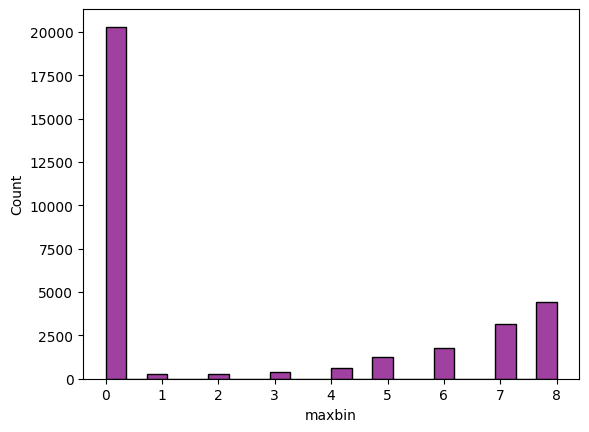

In [87]:
y=sns.histplot(fft_vader_denoised_mfft['maxbin'],color = 'purple')


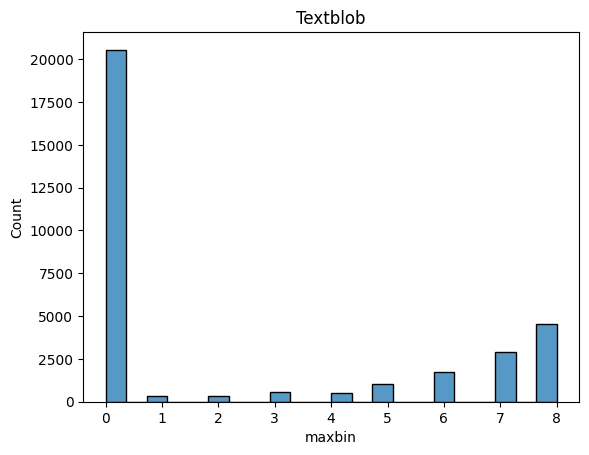

In [88]:
fig, ax = plt.subplots()
y= sns.histplot(fft_textblob_denoised_mfft['maxbin']).set_title('Textblob') 

plt.show()

In [89]:
compare = pd.DataFrame()
compare['VADER'] = fft_vader_denoised_mfft.groupby(['maxbin'])['maxbin'].count()
compare['Textblob'] = fft_textblob_denoised_mfft.groupby(['maxbin'])['maxbin'].count()

<Axes: xlabel='maxbin'>

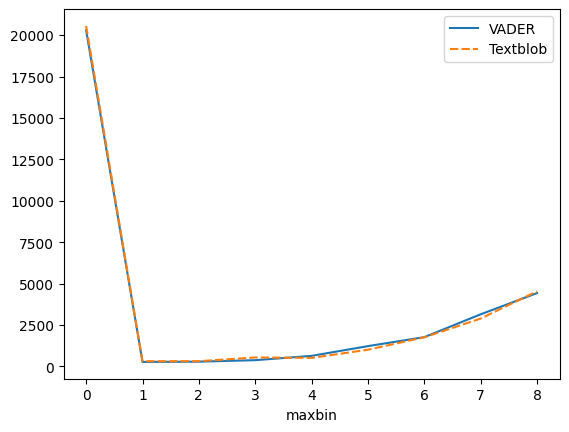

In [90]:
sns.lineplot(compare)

In [91]:
compare

,VADER,Textblob
maxbin,,
0,20294,20555
1,276,322
2,292,320
3,382,546
4,641,520
5,1230,1012
6,1771,1762
7,3150,2893
8,4431,4537


In [92]:
vader_inertias = []
tb_inertias = []
for k in range(1,10):
    kmeans_vader = KMeans(n_clusters=k,n_init=100)
    kmeans_vader.fit(np.array(fft_vader_denoised_mfft['maxbin']).reshape(-1,1))
    vader_inertias .append(kmeans_vader.inertia_)
    kmeans_textblob = KMeans(n_clusters=k,n_init=100)
    kmeans_textblob.fit(np.array(fft_textblob_denoised_mfft['maxbin']).reshape(-1,1))
    tb_inertias .append(kmeans_textblob.inertia_)

Text(0.5, 1.0, 'Textblob')

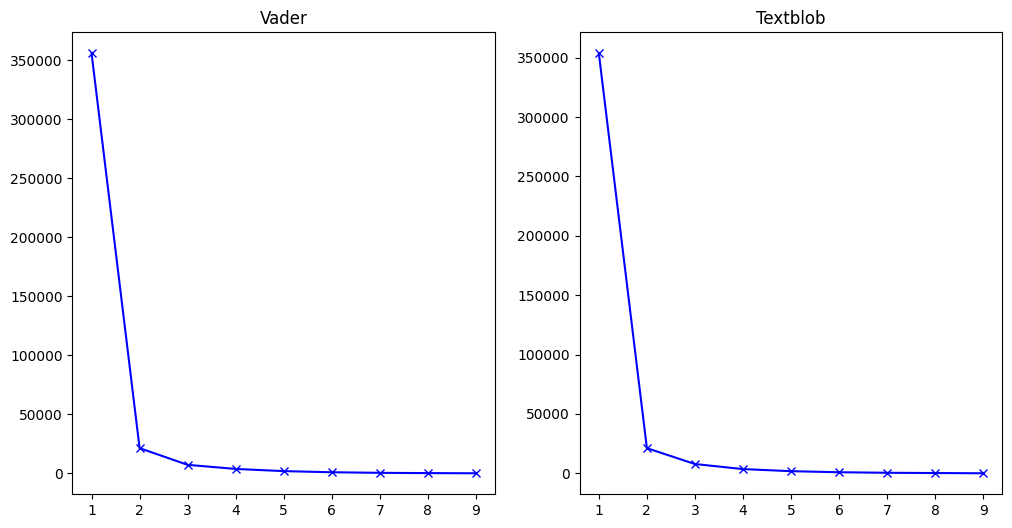

In [93]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.plot(range(1,10),vader_inertias,'bx-')
ax1.set_title("Vader")
ax2.plot(range(1,10),tb_inertias,'bx-')
ax2.set_title("Textblob")

In [94]:
kmeans_vader = KMeans(n_clusters=3,n_init=100)
kmeans_textblob = KMeans(n_clusters=3,n_init=100)

In [95]:
kmeans_vader.fit(np.array(fft_vader_denoised_mfft['maxbin']).reshape(-1,1))
vader_preds = kmeans_vader.predict(np.array(fft_vader_denoised_mfft['maxbin']).reshape(-1,1))
fft_vader_denoised_mfft['Cluster_num'] = pd.Series(vader_preds, index=fft_vader_denoised_mfft.index)

kmeans_textblob.fit(np.array(fft_textblob_denoised_mfft['maxbin']).reshape(-1,1))
tb_preds = kmeans_textblob.predict(np.array(fft_textblob_denoised_mfft['maxbin']).reshape(-1,1))
fft_textblob_denoised_mfft['Cluster_num'] = pd.Series(tb_preds, index=fft_textblob_denoised_mfft.index)

In [124]:
vader_cluster_freq = fft_vader_denoised_mfft['Cluster_num'].value_counts().sort_index()
tb_cluster_freq = fft_textblob_denoised_mfft['Cluster_num'].value_counts().sort_index()

In [151]:
compare_maxfft_clusters = pd.DataFrame()
compare_maxfft_clusters['VADER_Clusters'] = pd.DataFrame(vader_cluster_freq)
compare_maxfft_clusters['Textblob_Clusters'] = tb_cluster_freq
compare_maxfft_clusters['Cluster'] = [0,1,2]

In [152]:
compare_maxfft_clusters

,VADER_Clusters,Textblob_Clusters,Cluster
0,7581,7430,0
1,20862,21197,1
2,4024,3840,2


In [153]:
df_maxfft_cluster = pd.melt(compare_maxfft_clusters, id_vars="Cluster", var_name="Type", value_name="Freq")
df_maxfft_cluster

,Cluster,Type,Freq
0,0,VADER_Clusters,7581
1,1,VADER_Clusters,20862
2,2,VADER_Clusters,4024
3,0,Textblob_Clusters,7430
4,1,Textblob_Clusters,21197
5,2,Textblob_Clusters,3840


Text(0.5, 1.0, 'Max FFT Clustering for VADER and Textblob')

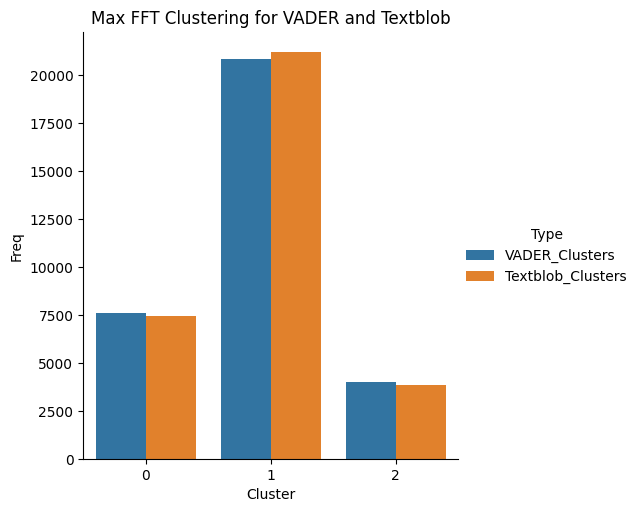

In [228]:
sns.catplot(x='Cluster', y='Freq', hue='Type', data=df_maxfft_cluster, kind='bar')
plt.title('Max FFT Clustering for VADER and Textblob')

#add data labels to this

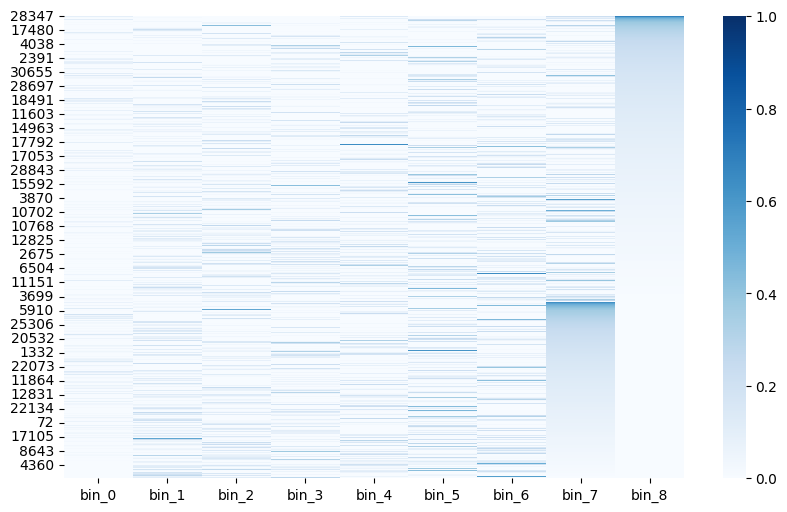

In [166]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(fft_vader_denoised_mfft.query('Cluster_num == 0')[fft_cols].sort_values(by = ['bin_8','bin_7','bin_6','bin_5','bin_4','bin_3','bin_2','bin_1','bin_0'],ascending=[False,False,False,False,False,False,False,False,False]),cmap="Blues")

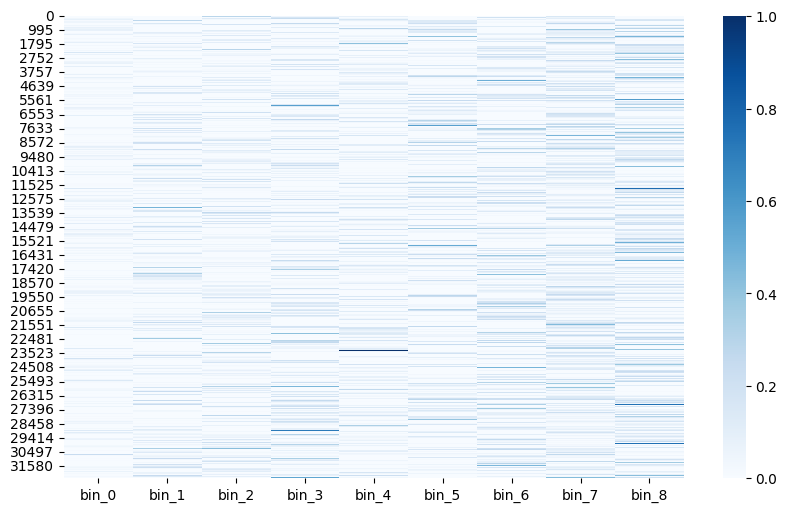

In [122]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(fft_textblob_denoised_mfft.query('Cluster_num == 0')[fft_cols],cmap="Blues")

In [121]:
fft_vader_denoised_mfft.query('Cluster_num == 2')

,Unnamed: 0,Movie_ID,Frame No.,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,maxbin,Cluster_num
11,11,m0,12,0.016212,0.000000,0.000000,0.000000,0.114270,0.288951,0.032949,0.000000,0.0,6,2
13,13,m0,14,0.096709,0.024765,0.001701,0.000000,0.000000,0.216355,0.000000,0.000000,0.0,5,2
22,22,m0,23,0.000000,0.401269,0.000000,0.000000,0.000762,0.000000,0.118905,0.000000,0.0,6,2
23,23,m0,24,0.069706,0.016880,0.000000,0.037291,0.096288,0.000000,0.000000,0.040101,0.0,4,2
31,31,m0,32,0.060080,0.000000,0.023463,0.029597,0.000000,0.267221,0.000000,0.000000,0.0,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32380,32380,m613,46,0.034524,0.127311,0.000000,0.041504,0.000000,0.028222,0.000000,0.000000,0.0,3,2
32428,32428,m615,22,0.000000,0.000000,0.000000,0.268378,0.265765,0.329600,0.000000,0.000000,0.0,5,2
32438,32438,m615,32,0.082358,0.000000,0.000000,0.263915,0.000000,0.000000,0.052747,0.000000,0.0,3,2
32456,32456,m615,50,0.035765,0.000000,0.189597,0.017319,0.053104,0.052054,0.000000,0.002667,0.0,5,2


Text(0.5, 1.0, 'VADER : Clustering on MaxFFT')

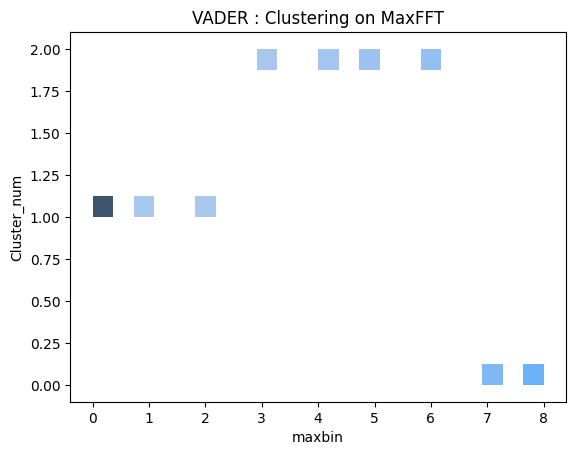

In [118]:
sns.histplot(data=fft_vader_denoised_mfft,y=str('Cluster_num'),x='maxbin').set_title('VADER : Clustering on MaxFFT')
#add data labels if possible 

Text(0.5, 1.0, 'TextBlob : Clustering on MaxFFT')

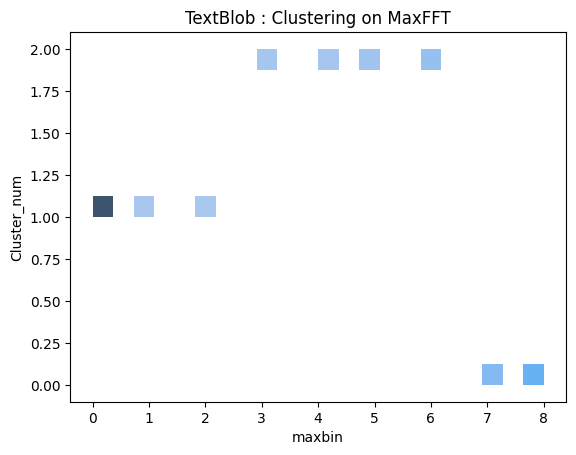

In [119]:
sns.histplot(data=fft_textblob_denoised_mfft,y=str('Cluster_num'),x='maxbin').set_title('TextBlob : Clustering on MaxFFT')

In [168]:
vader_maxfft_max_movies = fft_vader_denoised_mfft.query('Cluster_num == 0')
textblob_maxfft_max_movies=fft_textblob_denoised_mfft.query('Cluster_num == 0')

In [113]:
vader_maxfft_max_movies

,Unnamed: 0,Movie_ID,Frame No.,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,maxbin,Cluster_num
6,6,m0,7,0.005995,0.134971,0.059251,0.000000,0.000000,0.000000,0.228746,0.182125,0.000000,7,0
7,7,m0,8,0.016116,0.126096,0.006657,0.024349,0.121785,0.000000,0.000000,0.000000,0.021600,8,0
9,9,m0,10,0.000000,0.055230,0.027833,0.033905,0.090092,0.058566,0.000000,0.052762,0.000000,7,0
12,12,m0,13,0.000000,0.018385,0.153688,0.000000,0.000000,0.006230,0.122187,0.055892,0.093961,8,0
35,35,m0,36,0.000000,0.000000,0.036429,0.051446,0.000000,0.000000,0.000000,0.146254,0.267461,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32449,32449,m615,43,0.018214,0.000000,0.000000,0.082079,0.165949,0.000344,0.000000,0.144984,0.000000,7,0
32457,32457,m615,51,0.000000,0.021250,0.000000,0.000000,0.103049,0.081658,0.000000,0.038517,0.113043,8,0
32461,32461,m616,3,0.031444,0.000000,0.013000,0.017090,0.003825,0.000000,0.212198,0.047549,0.000000,7,0
32463,32463,m616,5,0.032266,0.139660,0.000000,0.000000,0.185042,0.000000,0.000000,0.036898,0.000000,7,0


In [106]:
vader_maxfft_count = pd.DataFrame(index=[],columns=['Movie_ID','Total_frames','high_Freq_frames','hi_Freq%'])

In [188]:
vader_high_freq_movies_maxfft = vader_maxfft_max_movies['Movie_ID'].unique()
vader_count_maxfft={}
for movie in vader_high_freq_movies_maxfft:
    vader_count_maxfft[movie] = vader_maxfft_max_movies['Movie_ID'].value_counts()[movie]*100/fft_vader_denoised_mfft['Movie_ID'].value_counts()[movie]

In [189]:
textblob_high_freq_movies_maxfft = textblob_maxfft_max_movies['Movie_ID'].unique()
textblob_count_maxfft={}
for movie in textblob_high_freq_movies_maxfft:
    textblob_count_maxfft[movie] = textblob_maxfft_max_movies['Movie_ID'].value_counts()[movie]*100/fft_textblob_denoised_mfft['Movie_ID'].value_counts()[movie]

In [240]:
compare_movies_maxfft_hi_freq= pd.DataFrame(pd.Series(textblob_count_maxfft),columns = ['Hi_Freq_Textblob_%'])
compare_movies_maxfft_hi_freq1 = pd.DataFrame(pd.Series(vader_count_maxfft),columns = ['Hi_Freq_VADER_%'])

In [241]:
compare_movies_maxfft_hi_freq['Movie_ID']=compare_movies_maxfft_hi_freq.index
compare_movies_maxfft_hi_freq1['Movie_ID']=compare_movies_maxfft_hi_freq1.index

In [242]:
compare_movies_final_hiFreq = compare_movies_maxfft_hi_freq.merge(compare_movies_maxfft_hi_freq1,how='left',on='Movie_ID')

In [243]:
compare_movies_final_hiFreq['VADER_Rank'] =compare_movies_final_hiFreq['Hi_Freq_VADER_%'].rank(axis=0, method='average', numeric_only=False, na_option='keep', ascending=False, pct=False)

In [244]:
compare_movies_final_hiFreq['Total_Hi_Freq_%'] = compare_movies_final_hiFreq['Hi_Freq_Textblob_%']+compare_movies_final_hiFreq['Hi_Freq_VADER_%']

In [245]:
compare_movies_final_hiFreq['Textblob_Rank'] =compare_movies_final_hiFreq['Hi_Freq_Textblob_%'].rank(axis=0, method='average', numeric_only=False, na_option='keep', ascending=False, pct=False)

In [246]:
compare_movies_final_hiFreq.sort_values(by = 'Total_Hi_Freq_%',ascending=False) #add textblob and VADER Ranks here, also No of Frames 

,Hi_Freq_Textblob_%,Movie_ID,Hi_Freq_VADER_%,VADER_Rank,Total_Hi_Freq_%,Textblob_Rank
269,100.000000,m270,50.000000,10.5,150.000000,1.5
73,43.333333,m73,53.333333,6.0,96.666667,12.0
110,34.482759,m110,58.620690,1.0,93.103448,57.5
28,45.945946,m28,45.945946,23.0,91.891892,9.0
393,44.897959,m394,46.938776,19.0,91.836735,10.0
...,...,...,...,...,...,...
526,6.896552,m531,6.896552,596.0,13.793103,602.0
134,4.545455,m134,9.090909,580.0,13.636364,610.0
378,20.689655,m379,NaN,NaN,NaN,365.0
456,37.500000,m459,NaN,NaN,NaN,35.5


In [247]:
movie_titles = pd.read_csv('/content/drive/MyDrive/Research_2023/Codes_colab_notebook/movie_titles_metadata.csv')

In [248]:
movie_titles

,Movie_ID,Movie_Name,Movie_Yr,Movie_Rating,Movie_Votes,Movie_Genre
0,m0,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance']
1,m1,1492: conquest of paradise,1992,6.2,10421.0,['adventure' 'biography' 'drama' 'history']
2,m2,15 minutes,2001,6.1,25854.0,['action' 'crime' 'drama' 'thriller']
3,m3,2001: a space odyssey,1968,8.4,163227.0,['adventure' 'mystery' 'sci-fi']
4,m4,48 hrs.,1982,6.9,22289.0,['action' 'comedy' 'crime' 'drama' 'thriller']
...,...,...,...,...,...,...
612,m612,watchmen,2009,7.8,135229.0,['action' 'crime' 'fantasy' 'mystery' 'sci-fi'...
613,m613,xxx,2002,5.6,53505.0,['action' 'adventure' 'crime']
614,m614,x-men,2000,7.4,122149.0,['action' 'sci-fi']
615,m615,young frankenstein,1974,8.0,57618.0,['comedy' 'sci-fi']


In [249]:
compare_movies_final_hiFreq = compare_movies_final_hiFreq.merge(movie_titles,on='Movie_ID',how='left')

In [253]:
result_maxfft_movies = compare_movies_final_hiFreq.sort_values(by = 'Total_Hi_Freq_%',ascending=False)

In [254]:
result_maxfft_movies.to_csv('result_maxfft_compare_hifreq_movies.csv')

In [255]:
result_maxfft_movies

,Hi_Freq_Textblob_%,Movie_ID,Hi_Freq_VADER_%,VADER_Rank,Total_Hi_Freq_%,Textblob_Rank,Movie_Name,Movie_Yr,Movie_Rating,Movie_Votes,Movie_Genre
269,100.000000,m270,50.000000,10.5,150.000000,1.5,the black dahlia,2006,5.6,35706.0,['crime' 'drama' 'history' 'mystery' 'thriller']
73,43.333333,m73,53.333333,6.0,96.666667,12.0,the ghost and the darkness,1996,6.6,19954.0,['adventure' 'drama' 'thriller']
110,34.482759,m110,58.620690,1.0,93.103448,57.5,kalifornia,1993,6.7,21830.0,['crime' 'drama' 'thriller']
28,45.945946,m28,45.945946,23.0,91.891892,9.0,barry lyndon,1975,8.1,40622.0,['drama' 'romance' 'war']
393,44.897959,m394,46.938776,19.0,91.836735,10.0,hudson hawk,1991,5.4,22116.0,['action' 'adventure' 'comedy' 'action' 'adven...
...,...,...,...,...,...,...,...,...,...,...,...
526,6.896552,m531,6.896552,596.0,13.793103,602.0,star trek: the motion picture,1979,6.2,25723.0,['adventure' 'fantasy' 'mystery' 'sci-fi']
134,4.545455,m134,9.090909,580.0,13.636364,610.0,metropolis,1927,8.4,40730.0,['adventure' 'drama' 'sci-fi']
378,20.689655,m379,NaN,NaN,NaN,365.0,halloween,1978,7.9,64690.0,['horror' 'thriller']
456,37.500000,m459,NaN,NaN,NaN,35.5,the nightmare before christmas,1993,8.0,81753.0,['animation' 'family' 'fantasy' 'musical']
